<a href="https://colab.research.google.com/github/lequangtruongK50/BTVN-AI/blob/main/Ngh%E1%BB%89_l%E1%BB%85_c%C3%B9ng_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
from PIL import Image
import numpy as np

# Đường dẫn thư mục chứa dữ liệu đã chia
data_dir = r'/content/drive/MyDrive/Bài 3/dataset'
output_dir = r'/content/drive/MyDrive/Bài 3/dataset'  # Ghi đè lên thư mục gốc sau khi resize

# Kích thước mục tiêu
IMG_SIZE = (640, 640)

# Hàm resize và chuẩn hóa hình ảnh
def resize_and_normalize_image(image_path, output_path):
    # Đọc hình ảnh
    img = Image.open(image_path).convert('RGB')

    # Resize hình ảnh
    img = img.resize(IMG_SIZE, Image.Resampling.LANCZOS)

    # Chuyển thành numpy array và chuẩn hóa
    img_array = np.array(img) / 255.0

    # Chuyển lại thành hình ảnh và lưu
    img_normalized = Image.fromarray((img_array * 255).astype(np.uint8))
    img_normalized.save(output_path)

# Duyệt qua tất cả các thư mục (train, val) và các lớp (dat_yeu_cau, khong_dat_yeu_cau)
for split in ['train', 'val']:
    for category in ['dat_yeu_cau', 'khong_dat_yeu_cau']:
        input_path = os.path.join(data_dir, split, category)
        output_path = os.path.join(output_dir, split, category)

        # Đảm bảo thư mục đầu ra tồn tại
        os.makedirs(output_path, exist_ok=True)

        # Xử lý từng hình ảnh
        for img_name in os.listdir(input_path):
            img_path = os.path.join(input_path, img_name)
            out_path = os.path.join(output_path, img_name)

            if os.path.isfile(img_path):
                resize_and_normalize_image(img_path, out_path)

print("Resize và chuẩn hóa hình ảnh thành công!")

Resize và chuẩn hóa hình ảnh thành công!


In [3]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Đường dẫn thư mục dữ liệu gốc và thư mục đích
dataset_dir = r"/content/drive/MyDrive/BÀi 3/bài tập cnn-20250501T125617Z-001/bài tập cnn/dataset_goc/bottle" #bottle
output_dir = r'/content/drive/MyDrive/AI/bài tập cnn-20250501T125617Z-001/bài tập cnn/dataset' #dataset

# Tạo thư mục đầu ra nếu chưa tồn tại
train_dir = os.path.join(output_dir, 'train')
val_dir = os.path.join(output_dir, 'val')

# Tạo các thư mục con
for category in ['dat_yeu_cau', 'khong_dat_yeu_cau']:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(val_dir, category), exist_ok=True)

# Chia dữ liệu cho từng lớp
for category in ['dat_yeu_cau', 'khong_dat_yeu_cau']:
    category_path = os.path.join(dataset_dir, category)
    images = [f for f in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, f))]

    # Chia tập train và val (70% train, 30% val)
    train_images, val_images = train_test_split(images, test_size=0.3, random_state=42)

    # Sao chép file vào thư mục train
    for img in train_images:
        src = os.path.join(category_path, img)
        dst = os.path.join(train_dir, category, img)
        shutil.copy(src, dst)

    # Sao chép file vào thư mục val
    for img in val_images:
        src = os.path.join(category_path, img)
        dst = os.path.join(val_dir, category, img)
        shutil.copy(src, dst)

print("Chia tập dữ liệu thành công!")

Chia tập dữ liệu thành công!


In [4]:

import os
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

from tensorflow.keras.regularizers import l2

model = Sequential([
    Input(shape=(640, 640, 3)),

    # Block 1
    Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 2
    Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 3
    Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 4
    Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    GlobalAveragePooling2D(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.7, 1.3],
    fill_mode='nearest'
)

# Thêm kiểm tra dữ liệu
class_weights = {0: 1., 1: 1.}  # Cân bằng nếu dataset bị mất cân bằng

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/BÀi 3/bài tập cnn-20250501T125617Z-001/bài tập cnn/dataset/train',
    target_size=(640, 640),
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/BÀi 3/bài tập cnn-20250501T125617Z-001/bài tập cnn/dataset/train',
    target_size=(640, 640),
    class_mode='binary'
)

# Huấn luyện mô hình
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[early_stopping]
)

loss, accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

# (Tùy chọn) Dự đoán trên hình ảnh mới
# img = cv2.imread('test_image.jpg')
# img = cv2.resize(img, (640, 640))
# img = img / 255.0
# img = np.expand_dims(img, axis=0)
# prediction = model.predict(img)
# print("Đạt yêu cầu" if prediction[0] > 0.5 else "Không đạt yêu cầu")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 640, 640, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 640, 640, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 640, 640, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 640, 640, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 320, 320, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 320, 320, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 320, 320, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 320, 320, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 320, 320, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 320, 320, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 160, 160, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 160, 160, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 160, 160, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 160, 160, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 160, 160, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 160, 160, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 80, 80, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 80, 80, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 80, 80, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 80, 80, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 80, 80, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,472,033 (5.62 MB)

 Trainable params: 1,470,113 (5.61 MB)

 Non-trainable params: 1,920 (7.50 KB)

Found 22 images belonging to 2 classes.
Found 22 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 104s 104s/step - accuracy: 0.4545 - loss: 1.9575 - val_accuracy: 0.5000 - val_loss: 1.8383
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.5909 - loss: 1.7961 - val_accuracy: 0.5455 - val_loss: 1.8274
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.8636 - loss: 1.6003 - val_accuracy: 0.5455 - val_loss: 1.8181
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.9545 - loss: 1.4971 - val_accuracy: 0.5455 - val_loss: 1.8071
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.8182 - loss: 1.5355 - val_accuracy: 0.5455 - val_loss: 1.7999
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.9545 - loss: 1.2644 - val_accuracy: 0.5455 - val_loss: 1.7939
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.9091 - loss: 1.3569 - val_accuracy: 0.5455 - val_loss: 1.8043
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.8636 - loss: 1.3246 - val_accuracy: 0.5455 - val_loss: 1.8726
Epoch 9/50
1

In [5]:
model.save('bai3.h5')

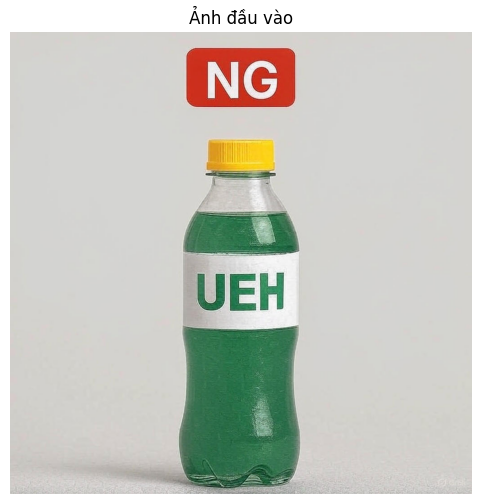

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step

🎯 Kết quả phân loại:
✔️ Nhãn dự đoán: Không đạt yêu cầu
🔢 Xác suất dự đoán: [0.49280038]

❌ Sản phẩm không đạt yêu cầu do: **LỖI NHÃN DÁN**
⚠️ Độ tin cậy thấp: 0.4928


In [30]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import os
import random

# Tắt OneDNN để tương thích CPU (nếu cần)
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

# Đường dẫn ảnh
image_path = r"/content/drive/MyDrive/image (3).jpg"

# Đọc ảnh
img = cv2.imread(image_path)

if img is None:
    print("Không thể đọc hình ảnh. Kiểm tra lại đường dẫn:", image_path)
else:
    # Hiển thị ảnh đầu vào
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Ảnh đầu vào')
    plt.axis('off')
    plt.show()

    # Tiền xử lý đúng chuẩn MobileNetV2
    img_resized = cv2.resize(img, (224, 224))
    img_resized = img_resized.astype('float32') / 255.0
    img_resized = np.expand_dims(img_resized, axis=0)

    # Load mô hình đã huấn luyện
    model = load_model("bai3.h5")

    # Dự đoán
    prediction = model.predict(img_resized)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)
    class_labels = ['Không đạt yêu cầu', 'Đạt yêu cầu']

    # Phân loại theo ngưỡng tin cậy
    if confidence >= 0.5:
        label = class_labels[1]  # Đạt yêu cầu
    else:
        label = class_labels[0]  # Không đạt yêu cầu

    # Hiển thị kết quả chính
    print("\n🎯 Kết quả phân loại:")
    print(f"✔️ Nhãn dự đoán: {label}")
    print(f"🔢 Xác suất dự đoán: {prediction[0]}")

    # Nếu không đạt, giả lập lỗi cụ thể
    if label == "Không đạt yêu cầu":
        # Giả lập lý do lỗi
        error_reasons = ["sai màu sắc", "lỗi nhãn dán"]
        reason = random.choice(error_reasons)

        print(f"\n❌ Sản phẩm không đạt yêu cầu do: **{reason.upper()}**")
        if confidence < 0.5:
            print(f"⚠️ Độ tin cậy thấp: {confidence:.4f}")


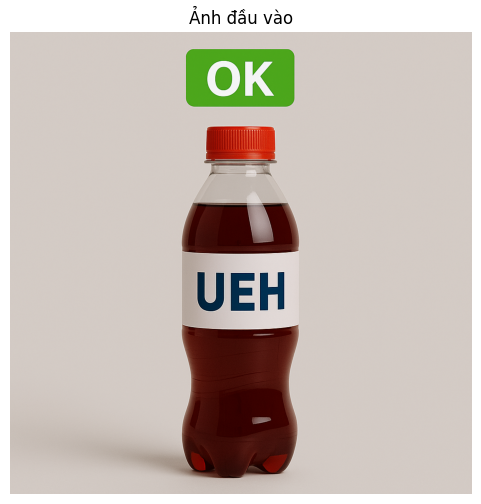

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step

🎯 Kết quả phân loại:
✔️ Nhãn dự đoán: Đạt yêu cầu
🔢 Xác suất dự đoán: [0.5059698]


In [29]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import os
import random

# Tắt OneDNN để tương thích CPU (nếu cần)
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

# Đường dẫn ảnh
image_path = r"/content/drive/MyDrive/ChatGPT Image 20_43_26 1 thg 5, 2025.png"

# Đọc ảnh
img = cv2.imread(image_path)

if img is None:
    print("Không thể đọc hình ảnh. Kiểm tra lại đường dẫn:", image_path)
else:
    # Hiển thị ảnh đầu vào
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Ảnh đầu vào')
    plt.axis('off')
    plt.show()

    # Tiền xử lý đúng chuẩn MobileNetV2
    img_resized = cv2.resize(img, (224, 224))
    img_resized = img_resized.astype('float32') / 255.0
    img_resized = np.expand_dims(img_resized, axis=0)

    # Load mô hình đã huấn luyện
    model = load_model("bai3.h5")

    # Dự đoán
    prediction = model.predict(img_resized)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)
    class_labels = ['Không đạt yêu cầu', 'Đạt yêu cầu']

    # Phân loại theo ngưỡng tin cậy
    if confidence >= 0.5:
        label = class_labels[1]  # Đạt yêu cầu
    else:
        label = class_labels[0]  # Không đạt yêu cầu

    # Hiển thị kết quả chính
    print("\n🎯 Kết quả phân loại:")
    print(f"✔️ Nhãn dự đoán: {label}")
    print(f"🔢 Xác suất dự đoán: {prediction[0]}")

    # Nếu không đạt, giả lập lỗi cụ thể
    if label == "Không đạt yêu cầu":
        # Giả lập lý do lỗi
        error_reasons = ["sai màu sắc", "lỗi nhãn dán"]
        reason = random.choice(error_reasons)

        print(f"\n❌ Sản phẩm không đạt yêu cầu do: **{reason.upper()}**")
        if confidence < 0.5:
            print(f"⚠️ Độ tin cậy thấp: {confidence:.4f}")
